In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/NLP

/content/drive/.shortcut-targets-by-id/1plMjpYu4pyxTZsV33MlYa9xEP127qxWB/NLP_Project


In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
ls

100k_t1_test.npy         noWE_SVM_linear_0.2
100k_t1_train.npy        noWE_SVM_linear_0.25
100k_t1_trial.npy        noWE_SVM_linear_0.3
100k_t2_test.npy         noWE_SVM_linear_0.35
100k_t2_train.npy        noWE_SVM_linear_0.4
100k_t2_trial.npy        noWE_SVM_linear_0.5
bestModelAcc.h5          noWE_SVM_linear_1
bestModel.h5             noWE_SVM_linear_2
bestModelLoss.h5         noWE_SVM_linear_5
finalDevLabels.labels    noWE_t2_test.npy
finalTestLabels.labels   noWE_t2_train.npy
finalTrainLabels.labels  noWE_t2_trial.npy
fin_noWE_t2_test.npy     preprocessed_test_text.txt
fin_noWE_t2_train.npy    preprocessed_train_text.txt
fin_noWE_t2_trial.npy    preprocessed_trial_text.txt
fin_t1_test.npy          rnnBestAcc.h5
fin_t1_train.npy         rnnBestLoss.h5
fin_t1_trial.npy         t2_test.npy
fin_t2_test.npy          t2_train.npy
fin_t2_train.npy         t2_trial.npy
fin_t2_trial.npy         tweet_by_ID_08_10_2021__12_50_02.txt
glove.twitter.27B/       tweet_by_ID_08_10_2021__12_50_02.t

In [5]:
trainData = open('preprocessed_train_text.txt', 'r').readlines()
trainLabels = open('finalTrainLabels.labels', 'r').readlines()
testData = open('preprocessed_test_text.txt', 'r').readlines()
testLabels = open('finalTestLabels.labels', 'r').readlines()
validData = open('preprocessed_trial_text.txt', 'r').readlines()
validLabels = open('finalDevLabels.labels', 'r').readlines()

In [6]:
for i in tqdm(range(len(trainData))):
    trainData[i] = trainData[i][:-1]
for i in tqdm(range(len(testData))):
    testData[i] = testData[i][:-1]
for i in tqdm(range(len(validData))):
    validData[i] = validData[i][:-1]

100%|██████████| 10009/10009 [00:00<00:00, 1028739.19it/s]


In [7]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(validLabels))):
    validLabels[i] = int(validLabels[i])

100%|██████████| 10008/10008 [00:00<00:00, 866461.51it/s]


In [8]:
trainData = trainData[1:]
testData = testData[1:]
validData = validData[1:]

In [9]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
validLabels = np.array(validLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
validLabels = validLabels.reshape((-1, ))

In [10]:
trainData[0]

'tweet thursday night party next got'

In [11]:
sentLen = []
vocab = set()
for i in trainData:
    sentLen.append(len(i))
    words = i.split()
    for word in words:
        vocab.add(word)
print('min len: ', min(sentLen))
print('max len: ', max(sentLen))
print('avg len: ', np.mean(sentLen))
print('med len: ', np.median(sentLen))
print('vocab: ', len(vocab))

min len:  6
max len:  114
avg len:  44.59743970739513
med len:  44.0
vocab:  44842


In [12]:
wordFreq = {}
for i in trainData:
    words = i.split()
    for word in words:
        if word in wordFreq:
            wordFreq[word] += 1
        else:
            wordFreq[word] = 1

In [13]:
sortedWordFreq = dict(sorted(wordFreq.items(), reverse=True, key=lambda item: item[1]))

In [14]:
ctr = 0
idx = 1
idxToWord = {}
wordToIdx = {}
for i in sortedWordFreq:
    # print(i, sortedWordFreq[i])
    ctr += 1
    # if sortedWordFreq[i] == 1:
        # break
    idxToWord[idx] = i
    wordToIdx[i] = idx
    idx += 1
print(ctr)

44842


In [15]:
idxToWord[100]
wordToIdx['wait']

100

In [16]:
for i in tqdm(range(len(trainData))):
    words = trainData[i].split()
    trainData[i] = [wordToIdx[word] for word in words if word in wordToIdx.keys()]

100%|██████████| 69992/69992 [00:00<00:00, 180963.08it/s]


In [17]:
for i in tqdm(range(len(testData))):
    words = testData[i].split()
    testData[i] = [wordToIdx[word] for word in words if word in wordToIdx.keys()]

100%|██████████| 20000/20000 [00:00<00:00, 243944.94it/s]


In [18]:
for i in tqdm(range(len(validData))):
    words = validData[i].split()
    validData[i] = [wordToIdx[word] for word in words if word in wordToIdx.keys()]

100%|██████████| 10008/10008 [00:00<00:00, 150396.60it/s]


In [19]:
sentLen = []
vocab = set()
for i in trainData:
    sentLen.append(len(i))
    for word in i:
        vocab.add(word)
print('min len: ', min(sentLen))
print('max len: ', max(sentLen))
print('avg len: ', np.mean(sentLen))
print('med len: ', np.median(sentLen))
print('vocab: ', len(vocab))

min len:  1
max len:  20
avg len:  6.980526345868099
med len:  7.0
vocab:  44842


In [20]:
from keras.preprocessing import sequence

In [21]:
X_train = sequence.pad_sequences(trainData, maxlen=10)
X_test = sequence.pad_sequences(testData, maxlen=10)
X_val = sequence.pad_sequences(validData, maxlen=10)

In [22]:
X_train.shape, X_test.shape

((69992, 10), (20000, 10))

In [23]:
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
from keras.utils import np_utils

In [25]:
trainLabels = np_utils.to_categorical(trainLabels).astype(np.int8)
testLabels = np_utils.to_categorical(testLabels).astype(np.int8)
validLabels = np_utils.to_categorical(validLabels).astype(np.int8)

In [30]:
model = Sequential()
model.add(Embedding(44843, 300, trainable=True))
model.add(SimpleRNN(100))
model.add(Dense(20, activation='softmax'))
model.summary()
checkPointLoss = ModelCheckpoint('rnnBestLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('rnnBestAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=5, batch_size=128, callbacks=[checkPointLoss, checkPointAcc])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         13452900  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               40100     
                                                                 
 dense_2 (Dense)             (None, 20)                2020      
                                                                 
Total params: 13,495,020
Trainable params: 13,495,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
547/547 [==============================] - ETA: 0s - loss: 2.5640 - accuracy: 0.2625
Epoch 00001: val_loss improved from inf to 2.45214, saving model to rnnBestLoss.h5

Epoch 00001: val_accuracy improved from -inf to 0.29107, saving model to rnnBestAcc.h5
547/547 [==============================]

In [31]:
# model.evaluate(X_test, testLabels)
model.load_weights('rnnBestLoss.h5')
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestAcc.h5')
model.evaluate(X_test, testLabels)

625/625 [==============================] - 3s 4ms/step - loss: 2.4420 - accuracy: 0.2955


[2.4419753551483154, 0.2955000102519989]

In [32]:
import matplotlib.pyplot as plt

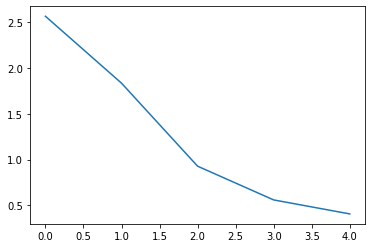

In [33]:
plt.plot(hist.history['loss'])

In [34]:
plt.style.use('seaborn')

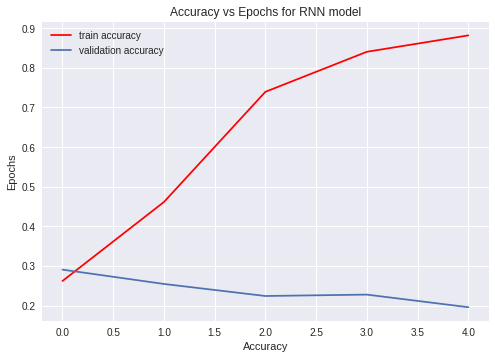

In [35]:
plt.plot(hist.history['accuracy'], label='train accuracy', c='red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.title('Accuracy vs Epochs for RNN model')
plt.show()

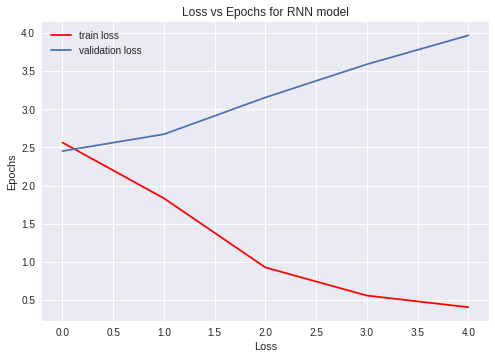

In [36]:
plt.plot(hist.history['loss'], label='train loss', c='red')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.title('Loss vs Epochs for RNN model')
plt.show()

In [37]:
from sklearn.metrics import classification_report

In [38]:
preds = model.predict(X_train)

In [39]:
preds = np.argmax(preds, axis=1)

In [40]:
finalLabels = np.argmax(trainLabels, axis=1)

In [41]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.35      0.86      0.50     15090
           1       0.63      0.16      0.25      7076
           2       0.38      0.72      0.50      6842
           3       0.57      0.05      0.09      3842
           4       0.37      0.72      0.49      4363
           5       0.96      0.01      0.02      2751
           6       0.75      0.03      0.06      2831
           7       0.61      0.20      0.30      3250
           8       0.61      0.04      0.08      2341
           9       0.71      0.00      0.01      1992
          10       1.00      0.01      0.03      2083
          11       0.39      0.66      0.49      2433
          12       0.52      0.42      0.46      1908
          13       0.76      0.01      0.01      1722
          14       0.79      0.02      0.03      1878
          15       0.79      0.03      0.05      1745
          16       1.00      0.00      0.01      1721
          17       0.68    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
finalLabels = np.argmax(testLabels, axis=1)
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.29      0.77      0.42      4312
           1       0.20      0.03      0.05      2022
           2       0.28      0.51      0.36      1955
           3       0.12      0.00      0.01      1099
           4       0.27      0.50      0.35      1246
           5       0.00      0.00      0.00       786
           6       0.20      0.00      0.00       809
           7       0.28      0.05      0.09       928
           8       0.35      0.02      0.03       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.26      0.45      0.33       696
          12       0.41      0.32      0.36       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.25      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.65    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
preds = model.predict(X_val)
preds = np.argmax(preds, axis=1)
finalLabels = np.argmax(validLabels, axis=1)
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.29      0.76      0.42      2156
           1       0.15      0.02      0.04      1011
           2       0.27      0.50      0.35       978
           3       0.15      0.01      0.01       549
           4       0.27      0.50      0.35       624
           5       0.00      0.00      0.00       393
           6       0.25      0.00      0.00       405
           7       0.33      0.06      0.11       465
           8       0.33      0.02      0.03       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.24      0.44      0.31       348
          12       0.39      0.30      0.34       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       1.00      0.00      0.01       250
          16       0.00      0.00      0.00       246
          17       0.64    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
model = Sequential()
model.add(Embedding(44843, 300, trainable=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(100))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
model.summary()
checkPointLoss = ModelCheckpoint('rnnBestLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('rnnBestAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=5, batch_size=128, callbacks=[checkPointLoss, checkPointAcc])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         13452900  
                                                                 
 dropout_1 (Dropout)         (None, None, 300)         0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100)               40100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                2020      
                                                                 
Total params: 13,495,020
Trainable params: 13,495,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
547/547 [=======================

In [38]:
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestLoss.h5')
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestAcc.h5')
model.evaluate(X_test, testLabels)

625/625 [==============================] - 2s 3ms/step - loss: 2.4451 - accuracy: 0.2964


[2.4450795650482178, 0.2964499890804291]

In [40]:
model = Sequential()
model.add(Embedding(44843, 300, trainable=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(100))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
model.summary()
checkPointLoss = ModelCheckpoint('rnnBestLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('rnnBestAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=5, batch_size=128, callbacks=[checkPointLoss, checkPointAcc])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         13452900  
                                                                 
 dropout_5 (Dropout)         (None, None, 300)         0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 100)         40100     
                                                                 
 dropout_6 (Dropout)         (None, None, 100)         0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 20)               

In [41]:
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestLoss.h5')
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestAcc.h5')
model.evaluate(X_test, testLabels)

625/625 [==============================] - 3s 5ms/step - loss: 2.4507 - accuracy: 0.2941


[2.4507248401641846, 0.294050008058548]

In [44]:
model = Sequential()
model.add(Embedding(44843, 300, trainable=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(200, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(150, return_sequences=True))
model.add(Dropout(0.5))
# model.add(SimpleRNN(100, return_sequences=True))
# model.add(Dropout(0.5))
model.add(SimpleRNN(75, return_sequences=False))
model.add(Dropout(0.3))
# model.add(SimpleRNN(50))
# model.add(Dropout(0.25))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(20, activation='softmax'))
model.summary()
checkPointLoss = ModelCheckpoint('rnnBestLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('rnnBestAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=15, batch_size=512, callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 300)         13452900  
                                                                 
 dropout_22 (Dropout)        (None, None, 300)         0         
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, None, 200)         100200    
                                                                 
 dropout_23 (Dropout)        (None, None, 200)         0         
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, None, 150)         52650     
                                                                 
 dropout_24 (Dropout)        (None, None, 150)         0         
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 75)               

In [45]:
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestLoss.h5')
model.evaluate(X_test, testLabels)
model.load_weights('rnnBestAcc.h5')
model.evaluate(X_test, testLabels)

625/625 [==============================] - 4s 7ms/step - loss: 2.5978 - accuracy: 0.2725


[2.5978221893310547, 0.27254998683929443]

In [34]:
stmodel = Sequential()
model.add(Embedding(44843, 300, trainable=True))
# model.add(Dropout(0.5))
model.add(SimpleRNN(100)
# model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
model.summary()
checkPointLoss = ModelCheckpoint('rnnBestLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('rnnBestAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=5, batch_size=128, callbacks=[checkPointLoss, checkPointAcc])

SyntaxError: ignored

In [ ]:
model = Sequential()
model.add(Embedding(44843, 300)) #vocab size, output size
model.add(LSTM(200)) # param is the size of the context vector 
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(20, activation='softmax')) # binary classification in the end
model.summary()
checkPoint = ModelCheckpoint('bestModel.h5', monitor='val_loss', verbose=True, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=5, batch_size=128, callbacks=[checkPoint])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         13452900  
                                                                 
 lstm (LSTM)                 (None, 200)               400800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, trainLabels, validation_data=(X_val, validLabels), epochs=5, batch_size=128, callbacks=[checkPoint])

Epoch 1/5
547/547 [==============================] - ETA: 0s - loss: 2.7647 - accuracy: 0.2110
Epoch 00001: val_loss improved from inf to 2.60788, saving model to bestModel.h5
547/547 [==============================] - 177s 317ms/step - loss: 2.7647 - accuracy: 0.2110 - val_loss: 2.6079 - val_accuracy: 0.2548
Epoch 2/5
547/547 [==============================] - ETA: 0s - loss: 2.5925 - accuracy: 0.2583
Epoch 00002: val_loss improved from 2.60788 to 2.53522, saving model to bestModel.h5
547/547 [==============================] - 166s 304ms/step - loss: 2.5925 - accuracy: 0.2583 - val_loss: 2.5352 - val_accuracy: 0.2714
Epoch 3/5
547/547 [==============================] - ETA: 0s - loss: 2.4402 - accuracy: 0.2935
Epoch 00003: val_loss improved from 2.53522 to 2.52648, saving model to bestModel.h5
547/547 [==============================] - 166s 304ms/step - loss: 2.4402 - accuracy: 0.2935 - val_loss: 2.5265 - val_accuracy: 0.2824
Epoch 4/5
547/547 [==============================] - ETA: 0

In [ ]:
 model.evaluate(X_test, testLabels)

625/625 [==============================] - 15s 23ms/step - loss: 2.7611 - accuracy: 0.2786


[2.7611165046691895, 0.2786000072956085]

In [ ]:
model.load_weights('bestModel.h5')

In [ ]:
 model.evaluate(X_test, testLabels)

625/625 [==============================] - 13s 21ms/step - loss: 2.5204 - accuracy: 0.2858


[2.520411252975464, 0.28584998846054077]